# XIV.10.1 a) 
# Схема Лакса

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import copy

In [52]:
T = 9
L = 10

def u0(x):
    return math.sin(2 * math.pi * x / L); # заполнить в начале вне всех функций
    
def Lux(y, k_num, Nt, Nx):
    for n in range(1, Nt + 1):
        for m in range(1, Nx):
            y[n][m] = (y[n - 1][m + 1] - y[n - 1][m - 1]) * (1 - k_num) / 2
        y[n][0] = (k_num * y[n - 1][1] + y[n - 1][0] * (1 - k_num)) * (1 - k_num) / (1 + k_num)
        y[n][Nx] = - (1 - k_num) * (k_num * y[n - 1][Nx - 1] + y[n - 1][Nx] * (k_num + 1)) / (3 * k_num - 1.0)

Text(0, 0.5, 'u(x) for t = T')

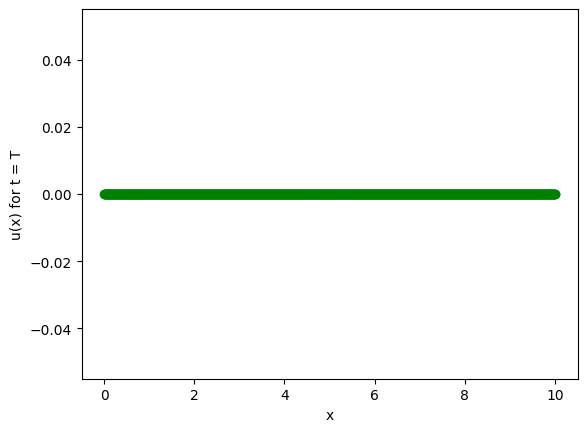

In [45]:
t = 1e-2
h = 1e-2
k_num = t / h
Nx = int (L / h)
Nt = int (T / t)
y = np.array([[0.0 for i in range(Nx + 1)] for i in range(Nt + 1)])
for i in range(0, Nx + 1):
    y[0][i] = u0(i * h)

Lux(y, k_num, Nt, Nx)

x = np.array([i * h for i in range(0, Nx + 1)])
plt.plot(x, y[1], 'go', linestyle = '--')
plt.xlabel("x")
plt.ylabel("u(x) for t = T")

Text(0, 0.5, 'u(x, t) for t = T')

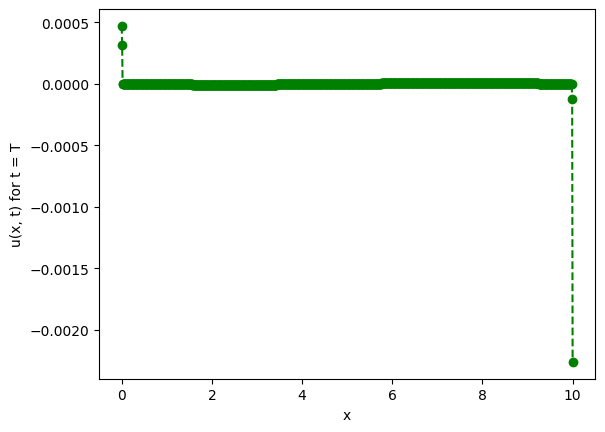

In [54]:
t = 0.6 * 1e-2
h = 1e-2
k_num = t / h
Nx = int (L / h)
Nt = int (T / t)
y = np.array([[0.0 for i in range(Nx + 1)] for i in range(Nt + 1)])
for i in range(0, Nx + 1):
    y[0][i] = u0(i * h)

Lux(y, k_num, Nt, Nx)

x = np.array([i * h for i in range(0, Nx + 1)])
plt.plot(x, y[2], 'go', linestyle = '--')
plt.xlabel("x")
plt.ylabel("u(x, t) for t = T")

C:\Users\user\AppData\Local\Temp\ipykernel_14356\491911106.py:12: RuntimeWarning: overflow encountered in scalar divide
  y[n][Nx] = - (1 - k_num) * (k_num * y[n - 1][Nx - 1] + y[n - 1][Nx] * (k_num + 1)) / (3 * k_num - 1.0)
C:\Users\user\AppData\Local\Temp\ipykernel_14356\491911106.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  y[n][m] = (y[n - 1][m + 1] - y[n - 1][m - 1]) * (1 - k_num) / 2


Text(0, 0.5, 'u(x) for t = T')

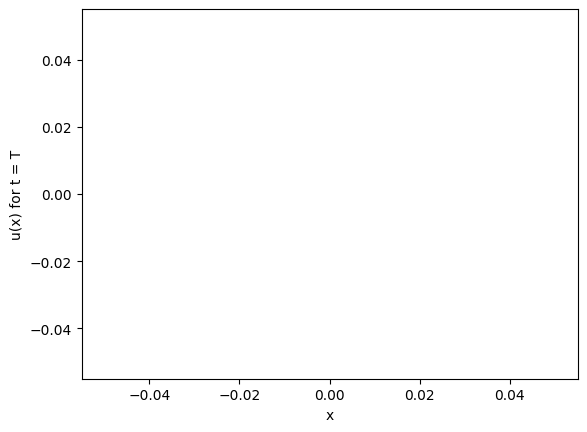

In [53]:
t = 0.3 * 1e-2
h = 1e-2
k_num = t / h
Nx = int (L / h)
Nt = int (T / t)
y = np.array([[0.0 for i in range(Nx + 1)] for i in range(Nt + 1)])
for i in range(0, Nx + 1):
    y[0][i] = u0(i * h)

Lux(y, k_num, Nt, Nx)

x = np.array([i * h for i in range(0, Nx + 1)])
plt.plot(x, y[Nt], 'go', linestyle = '--')
plt.xlabel("x")
plt.ylabel("u(x) for t = T")